## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import pandas as pd

In [60]:
dfs = pd.read_csv('students-data.csv',delimiter = ';')
dfs.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [8]:
dfs.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
dfs.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
#No missing values to drop the coloums

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [20]:
dfs.select_dtypes(exclude = 'int64').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [42]:
dfs_dummy = dfs.copy()

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [23]:
dfs.select_dtypes(include = 'int64').columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [22]:
dfs.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [61]:
dfs.drop("traveltime", axis=1, inplace = True)
dfs.drop("studytime", axis=1, inplace = True)
dfs.drop("failures", axis=1, inplace = True)
dfs.drop("famrel", axis=1, inplace = True)
dfs.drop("freetime", axis=1, inplace = True)
dfs.drop("Dalc", axis=1, inplace = True)
dfs.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [46]:
dfs.shape

(395, 27)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [62]:
from sklearn.preprocessing import LabelEncoder

categorical_feature_mask = dfs.dtypes==object 
categorical_feature_mask
categorical_cols = dfs.columns[categorical_feature_mask].tolist()
categorical_cols

le = LabelEncoder()
dfs[categorical_cols] = dfs[categorical_cols].apply(lambda col: le.fit_transform(col))

dfs[categorical_cols].head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0
9,0,1,1,0,1,2,2,1,1,0,1,1,1,1,1,1,0


In [45]:
dfs.shape

(395, 27)

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [63]:
import numpy as np
dfs['G1'] = np.where(dfs['G1'] < 10, 0, dfs['G1'])
dfs['G1'] = np.where(dfs['G1'] >= 10, 1, dfs['G1'])
dfs['G1'].head(20)

0     0
1     0
2     0
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    0
19    0
Name: G1, dtype: int64

In [64]:
dfs['G2'] = np.where(dfs['G2'] < 10, 0, dfs['G2'])
dfs['G2'] = np.where(dfs['G2'] >= 10, 1, dfs['G2'])
dfs['G2'].head(20)

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     0
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
Name: G2, dtype: int64

In [65]:
dfs['G3'] = np.where(dfs['G3'] < 10, 0, dfs['G3'])
dfs['G3'] = np.where(dfs['G3'] >= 10, 1, dfs['G3'])
dfs['G3'].head(20)

0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
Name: G3, dtype: int64

In [66]:
dfs.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [67]:
X = dfs.iloc[:, 0:26]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,1,1,0,0,4,5,4,11,0,0
391,1,1,17,1,1,1,3,1,3,3,...,0,1,1,0,5,4,2,3,1,1
392,1,1,21,0,0,1,1,1,2,2,...,0,1,0,0,3,3,3,3,1,0
393,1,1,18,0,1,1,3,2,3,2,...,0,1,1,0,1,4,5,0,1,1


In [82]:
y = dfs['G3']
y

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [76]:
dfs_dummy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [75]:
dfs_dummy.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [ ]:
#The correlation between G2 and G3 is high.


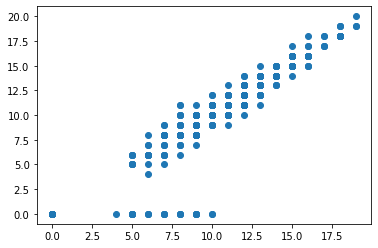

In [77]:
import matplotlib.pyplot as plot
plot.scatter(dfs_dummy['G2'], dfs_dummy['G3'])
plot.show()


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

Text(0.5, 0, 'Number of students')

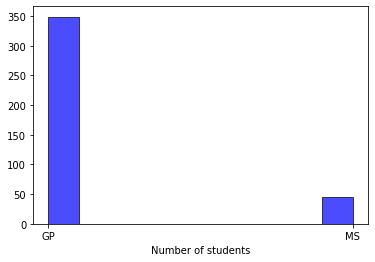

In [81]:
plot.hist(dfs_dummy['school'], color='blue', edgecolor = 'black', alpha = 0.7)
plot.xlabel('Number of students')

Text(0.5, 0, 'Students with different ages')

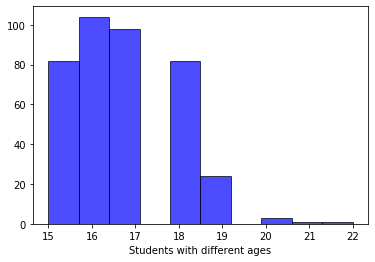

In [80]:
plot.hist(dfs_dummy['age'], color='blue', edgecolor = 'black', alpha = 0.7)
plot.xlabel('Students with different ages')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=95, random_state=42, stratify=y) 

In [99]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
273,0,1,17,0,0,1,1,2,0,0,...,0,1,0,1,2,2,1,2,1,1
265,0,1,18,0,1,0,3,4,2,2,...,1,1,1,0,5,4,1,13,1,1
64,0,0,15,1,1,1,4,3,3,3,...,1,1,1,1,4,4,2,0,1,1
131,0,0,15,1,0,1,1,1,0,2,...,0,1,1,1,3,2,4,0,0,0
122,0,0,16,1,1,1,2,4,2,1,...,1,1,1,1,2,2,5,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0,0,15,0,0,1,3,4,3,1,...,1,1,1,0,2,1,5,2,1,1
339,0,0,17,0,0,0,3,2,2,2,...,1,1,1,0,3,3,2,4,0,1
252,0,1,18,1,0,1,2,1,3,3,...,0,0,1,0,5,5,5,4,0,0
309,0,0,19,1,1,1,1,1,0,2,...,0,1,1,0,3,3,3,18,1,1


In [95]:
X_train.shape

(300, 26)

In [100]:
 y_train

273    1
265    1
64     1
131    0
122    1
      ..
38     1
339    1
252    0
309    1
350    0
Name: G3, Length: 300, dtype: int64

In [96]:
 y_train.shape

(300,)

In [101]:
X_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
286,0,0,18,1,0,1,2,2,0,0,...,1,1,1,0,3,2,2,5,1,1
208,0,0,16,1,0,1,1,1,0,2,...,1,1,0,0,2,4,5,6,0,0
92,0,0,16,1,1,1,3,1,2,2,...,1,1,0,0,3,3,2,4,0,0
305,0,0,18,1,0,1,2,4,3,0,...,1,1,1,0,3,1,3,8,1,1
193,0,1,16,0,0,1,3,3,3,3,...,1,1,1,0,2,4,5,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0,0,17,1,0,1,3,2,1,1,...,0,1,1,0,2,2,5,0,1,1
307,0,1,19,1,0,1,4,4,4,3,...,1,1,1,1,4,1,4,38,0,0
224,0,0,16,1,0,1,4,4,4,3,...,0,1,1,0,2,1,5,0,1,1
218,0,0,17,1,0,1,2,3,0,2,...,1,1,0,0,3,4,3,3,0,0


In [97]:
X_test.shape

(95, 26)

In [103]:
y_test

286    1
208    1
92     0
305    1
193    1
      ..
303    1
307    0
224    1
218    0
338    1
Name: G3, Length: 95, dtype: int64

In [98]:
y_test.shape

(95,)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
from sklearn import metrics
test_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, test_pred))
print(metrics.classification_report(y_test, test_pred))

[[29  2]
 [ 9 55]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        31
           1       0.96      0.86      0.91        64

    accuracy                           0.88        95
   macro avg       0.86      0.90      0.87        95
weighted avg       0.90      0.88      0.89        95



In [110]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, test_pred) # Testing acuracy score

0.8842105263157894

In [111]:
accuracy_score(y_train, model.predict(X_train)) #traning acuracy score

0.9366666666666666

# Naive bayes with Iris data

### Import Iris.csv

In [112]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [114]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [115]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [0]:
#In the case of no missing value there is no replacement 

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [116]:
y = iris_df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [142]:
X = iris_df.iloc[: , 1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Find the distribution of target variable (Class)

In [ ]:
#The distribution of is Species is uniformly distributed  

### Plot the distribution of target variable using histogram

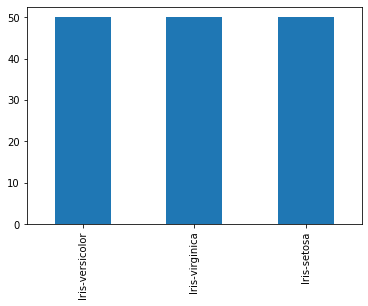

In [120]:
pd.value_counts(iris_df["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [173]:
iris_df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

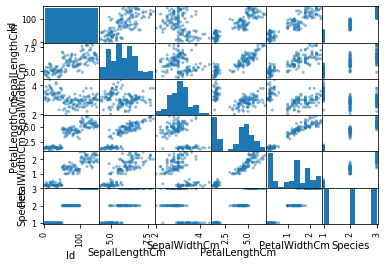

In [174]:
pd.plotting.scatter_matrix(iris_df) #Method-1
plot.show()

In [ ]:
#Species are uniformly distributed

In [ ]:
#petal lenght and petal width have a positive scatter 

### Summary Statistics and explain insights for at least 2 variables

In [175]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [0]:
#Species are uniformly distributed
#Sepal Length is alomost uniformly distributed
#where as petal lenghth is slightly Right skewed. 

### Correlation among all variables and give your insights

In [176]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
#PetalLength and PetalWidth highly correlated to species to identify which flower(species) it is.

In [ ]:
#SepalWidth is usless feature to indentify the flower(species)

### Split data in Training and Validation in 80:20

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7, stratify=y)


In [164]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
130,7.4,2.8,6.1,1.9
21,5.1,3.7,1.5,0.4
117,7.7,3.8,6.7,2.2
140,6.7,3.1,5.6,2.4
100,6.3,3.3,6.0,2.5
...,...,...,...,...
30,4.8,3.1,1.6,0.2
16,5.4,3.9,1.3,0.4
135,7.7,3.0,6.1,2.3
77,6.7,3.0,5.0,1.7


In [165]:
y_train

130     Iris-virginica
21         Iris-setosa
117     Iris-virginica
140     Iris-virginica
100     Iris-virginica
            ...       
30         Iris-setosa
16         Iris-setosa
135     Iris-virginica
77     Iris-versicolor
26         Iris-setosa
Name: Species, Length: 120, dtype: object

### Do Feature Scaling

In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Train and Fit NaiveBayes Model

In [140]:
from sklearn.naive_bayes import GaussianNB

In [139]:
# Non standardized data
model = GaussianNB()

In [167]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [168]:
# Non standardized data
test_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, test_pred))
print(metrics.classification_report(y_test, test_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [169]:
accuracy_score(y_test, test_pred) # Testing acuracy score

1.0

In [170]:
accuracy_score(y_train, model.predict(X_train)) #traning acuracy score

0.95

In [171]:
# On standardized data

gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_scale, y_train)

In [172]:
pred_train_std = gnb_std.predict(X_train_scale)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_scale)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
95.00%

Prediction accuracy for the test dataset
100.00%



In [162]:
test_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, test_pred))
print(metrics.classification_report(y_test, test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

